## Исследование данных о российском кинопрокате



**Описание данных**

- **title** — название фильма;
- **puNumber** — номер прокатного удостоверения;
- **show_start_date** — дата премьеры фильма;
- **type** — тип фильма;
- **film_studio** — студия-производитель;
- **production_country** — страна-производитель;
- **director** — режиссёр;
- **producer** — продюсер;
- **age_restriction** — возрастная категория;
- **refundable_support** — объём возвратных средств государственной поддержки;
- **nonrefundable_support** — объём невозвратных средств государственной поддержки;
- **financing_source** — источник государственного финансирования;
- **budget** — общий бюджет фильма;
- **ratings** — рейтинг фильма на КиноПоиске;
- **genres** — жанр фильма;
- **box_office** - сборы в рублях

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

In [2]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sn

from pymystem3 import Mystem
from collections import Counter

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


In [6]:
df_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
df_shows.head()

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [8]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Приведет столбцы puNumber к числовому значению:

In [9]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'],errors='coerce')

In [10]:
df_shows['puNumber'] = df_shows['puNumber'].astype('float64')

In [11]:
df = df_movies.merge(df_shows, on='puNumber', how='left')

Бросается в глаза "некрасивое" название: puNumber. Заменим:

In [12]:
df=df.rename(columns={'puNumber':'pu_number'})
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.000,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716.000,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416.000,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916.000,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815.000,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7485 non-null float64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 994.2+ KB


В столбцах: 
- pu_number, ratings, box_office - нужно поменять тип на числовой. Замену сделаем позже, когда разберемся с пропущенными значениями
- show_start_date - должен быть тип datetime

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7485 non-null float64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 994.2+ KB


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим какая доля пропусков: (можно сразу прикинуть % даже не умножая на 100)

In [15]:
df.isna().mean()

title                   0.000
pu_number               0.000
show_start_date         0.000
type                    0.000
film_studio             0.002
production_country      0.000
director                0.001
producer                0.076
age_restriction         0.000
refundable_support      0.956
nonrefundable_support   0.956
budget                  0.956
financing_source        0.956
ratings                 0.129
genres                  0.130
box_office              0.578
dtype: float64

In [16]:
df.isna().sum()

title                       0
pu_number                   1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

В столбцах:
- refundable_support, nonrefundable_support, budget, financing_source 96% данных пропущенно 
- box_office пропущено 58% данных
- ratings и genres пропущено 13% данных
- producer пропущено 0,8% данных
- 1 пропущенное значение в столбце pu_number

Заменим единственное пропущенное значение в номерах прокатного удостоверения на 0:

In [17]:
df['pu_number'] = df['pu_number'].fillna(0)

Нулевых значений в столбце ratings,  нет, поэтому для удобства заменим Nan на 0

In [18]:
df['ratings']=df['ratings'].fillna(0)

Остальные пропущенные значения оставим без изменений, чтобы сохранить достоверность исследования

Переведем столбец с датой в нужный формат, оставив только дату, так как время не указано:

In [19]:
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.date
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%d')
df.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.000,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716.000,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan


In [20]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

Создадим отдельный столбец с возрастной категорией (который будет в нужном нам формате int):

In [21]:
def age_grouped(row):
    age_group = row['age_restriction']
    if '18' in age_group:
        return 18
    elif '16' in age_group:
        return 16
    elif '12' in age_group:
        return 12
    elif '0' in age_group:
        return 0
    elif '6' in age_group:
        return 6

In [22]:
df['age_group']=df.apply(age_grouped,axis=1)

Оставим появившиеся пропуски как есть

Посмотрим на столбец с рейтингом:

In [23]:
df['ratings'].value_counts()

0      967
6.6    312
6.7    308
6.8    261
7.2    252
      ... 
90%      1
1.0      1
9.1      1
89%      1
1.2      1
Name: ratings, Length: 95, dtype: int64

Избавимся от значка % в столбце с рейтингами, останется целове число (91 вместо 91%) и разделим на 10 (скорее всего должно в рейтинге быть не 91%, а рейтинг 9.1):

In [24]:
def percent(x):
    if x:
        if '%' in x:
            x = x.replace('%','')
            x = float(x)
            x = x/10
    return x

In [25]:
df['ratings']=df['ratings'].apply(percent)

In [26]:
df['ratings'].value_counts()

0      967
6.6    312
6.7    308
6.8    261
7.2    252
      ... 
6.2      1
8.9      1
2.8      1
1.8      1
1.0      1
Name: ratings, Length: 95, dtype: int64

In [27]:
df['ratings'] = df['ratings'].astype(float)

In [28]:
df.isna().mean()

title                   0.000
pu_number               0.000
show_start_date         0.000
type                    0.000
film_studio             0.002
production_country      0.000
director                0.001
producer                0.076
age_restriction         0.000
refundable_support      0.956
nonrefundable_support   0.956
budget                  0.956
financing_source        0.956
ratings                 0.000
genres                  0.130
box_office              0.578
age_group               0.000
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
title                    7486 non-null object
pu_number                7486 non-null float64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  7486 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
age_group                7486 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(1), object(9)
memory usage: 1.0+ MB


##### Вывод

- В столбцах:
  - refundable_support, nonrefundable_support, budget, financing_source почти 97% данных пропущенно
  - box_office пропущено 70% данных
  - ratings и genres пропущено 38% данных
  - producer пропущено 35% данных
  - show_start_date, type, film_studio, director, age_restriction пропущено почти 30% данных
- Нулевых значений в стобце ratings нет, поэтому для удобства заменим Nan на 0, остальные пропущенные значения оставим без изменений, чтобы сохранить достоверность исследования
- Добавили новый столбец age_group, который сразу в нужном нам формате int
- Избавились от значка % в столбце с рейтингами, разделили получившиеся целые числа на 10 (скорее всего должно в данных быть не 91%, а рейтинг 9.1)

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [30]:
df.duplicated().sum()

0

Явных дубликатов не выявлено, поэтому поищем неявные дубликаты. Логически в данном исследовании дубликаты могут быть только в столбце с названиями фильмов, однако у одного фильма может быть несколько прокатных удостоверений, поэтому создаются дубликаты. И поэтому рассмотрим именно прокатные удостоверения:

In [31]:
df['pu_number'].duplicated().sum()

2

2 дубликата в прокатных удостоверениях. Скорее всего они появились из-за ошибки

In [32]:
df['pu_number'] = df['pu_number'].astype(int)

In [33]:
df=df.drop_duplicates(subset=['pu_number']).reset_index(drop=True)

In [34]:
df['pu_number'].duplicated().sum()

0

In [35]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,18
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,6
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18


##### Вывод

Явных дубликатов не выявлено, поэтому поищем неявные дубликаты. Логически в данном исследовании дубликаты могут быть в столбце с названиями фильмов, однако у одного фильма может быть несколько прокатных удостоверений, поэтому создаются дубликаты. Так что удалили дубликаты именно в прокатных удостоверениях

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [36]:
list(df.columns.values)

['title',
 'pu_number',
 'show_start_date',
 'type',
 'film_studio',
 'production_country',
 'director',
 'producer',
 'age_restriction',
 'refundable_support',
 'nonrefundable_support',
 'budget',
 'financing_source',
 'ratings',
 'genres',
 'box_office',
 'age_group']

In [37]:
df[['type','production_country','financing_source', 'genres', 'pu_number','film_studio', 'director']].head()

,type,production_country,financing_source,genres,pu_number,film_studio,director
0,Художественный,США,NaN,"боевик,драма,мелодрама",221048915,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",Кевин Костнер
1,Художественный,СССР,NaN,"драма,военный",111013716,"Киностудия ""Мосфильм""",Е.Матвеев
2,Художественный,США,NaN,"фантастика,боевик,триллер",221038416,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",Тимур Бекмамбетов
3,Художественный,США,NaN,"фантастика,боевик,триллер",221026916,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",Тимур Бекмамбетов
4,Художественный,США,NaN,"фантастика,боевик,триллер",221030815,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",Тимур Бекмамбетов


In [38]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [39]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [40]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [41]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,18
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,6
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18


In [42]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [43]:
df['type'] = df['type'].str.strip()

In [44]:
df['film_studio'] = df['film_studio'].str.lower()

In [45]:
df['film_studio'].unique()

array(['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
       'киностудия "мосфильм"',
       'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
       ...,
       'дэниел гродник продакшнз, вандерфилм медиа корпорэйшн, импринт интертейнмент, вор хорс интертейнмент, пимиента ',
       'никелодеон анимейшн студиос, спин мастер',
       'анимаккорд лтд., ооо студия "анимаккорд"'], dtype=object)

##### Вывод

Почти во всех категориальных столбцах есть повторяющиеся значения, но это не дубликаты. Просто фильмы могут быть одного/нескольких одинаковых жанров, как страна-производитель или студия-производитель. Но из-за этого сложно достать одно какое-то название, так как их несколько под одним индексом

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [46]:
list(df.columns.values)

['title',
 'pu_number',
 'show_start_date',
 'type',
 'film_studio',
 'production_country',
 'director',
 'producer',
 'age_restriction',
 'refundable_support',
 'nonrefundable_support',
 'budget',
 'financing_source',
 'ratings',
 'genres',
 'box_office',
 'age_group']

In [47]:
df[['budget', 'refundable_support', 'nonrefundable_support', 'ratings', 'box_office']].describe()

,budget,refundable_support,nonrefundable_support,ratings,box_office
count,332.000,332.000,332.000,7484.000,3158.000
mean,127229716.684,11864457.831,48980988.892,5.650,76478696.161
std,188588333.115,24916555.264,59980117.923,2.412,240353122.823
min,0.000,0.000,0.000,0.000,0.000
25%,42000000.000,0.000,25000000.000,5.400,86239.000
50%,68649916.000,0.000,30000000.000,6.400,2327987.550
75%,141985319.500,15000000.000,40375000.000,7.200,23979671.025
max,2305074303.000,180000000.000,400000000.000,9.900,3073568690.790


In [48]:
df.pivot_table(index= 'title', values = ['nonrefundable_support','refundable_support','budget']).sort_values(by='budget').head(50)

,budget,nonrefundable_support,refundable_support
title,,,
Чудо-юдо,0.000,20000000.000,20000000.000
Дуxless 2,0.000,75000000.000,0.000
Бармен.,0.000,0.000,20000000.000
Большое путешествие,0.000,120000000.000,60000000.000
Савва. Сердце воина,0.000,100000000.000,60000000.000
Селфи,0.000,40000000.000,20000000.000
Баба Яга,0.000,138969465.000,0.000
Помню - не помню!,0.000,6000000.000,0.000
Два хвоста,0.000,60000000.000,10000000.000


У некоторых фильмов есть гос поддержка, но при этом общий бюджет фильма = 0:
- Большое путешествие
- Притяжение (2016)
- Савва. сердце воина
- Баба яга
- Два хвоста
- Помню - не помню!
- Бармен
- Дуxless 2
- Мифы
- Воин (2015)
- Чудо-юдо
- Любовь с ограничениями
- Принцесса и дракон
- 14+
- Тряпичный союз
- Селфи 

Оставим данные как есть

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [49]:
df['year_start_date'] = df['show_start_date'].dt.year

In [50]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group,year_start_date
0,Открытый простор,221048915,2015-11-27,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,18,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,6,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2016
3,Особо опасен,221026916,2016-06-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2016
4,Особо опасен,221030815,2015-07-29,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [51]:
df['main_director']= df['director'].str.split(",").str[0]

In [52]:
df['main_genres'] = df['genres'].str.split(",").str[0]

In [53]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group,year_start_date,main_director,main_genres
0,Открытый простор,221048915,2015-11-27,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,18,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,6,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [54]:
df['gov_help_conv'] = (df['refundable_support']+df['nonrefundable_support'])/df['budget']
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group,year_start_date,main_director,main_genres,gov_help_conv
0,Открытый простор,221048915,2015-11-27,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,18,2015,Кевин Костнер,боевик,nan
1,Особо важное задание,111013716,2016-09-13,Художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,6,2016,Е.Матвеев,драма,nan
2,Особо опасен,221038416,2016-10-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2016,Тимур Бекмамбетов,фантастика,nan
3,Особо опасен,221026916,2016-06-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2016,Тимур Бекмамбетов,фантастика,nan
4,Особо опасен,221030815,2015-07-29,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,18,2015,Тимур Бекмамбетов,фантастика,nan


In [55]:
df['gov_help_conv'].value_counts()

inf      17
0.649     6
0.658     5
0.500     5
0.700     5
         ..
0.242     1
0.650     1
0.595     1
0.625     1
0.236     1
Name: gov_help_conv, Length: 282, dtype: int64

Появились значения inf. Заменим их на nan, а потом заменим пропуски на 0, так как пропуски означают что в этих фильмах не было гос поддержки а inf образовались при делении на 0 :

In [56]:
df['gov_help_conv'] = df['gov_help_conv'].replace(np.inf, np.nan)

In [57]:
df['gov_help_conv'] = df['gov_help_conv'].fillna(0)

##### Вывод

- Добавили столбец с информацией о годе проката. Выделили год из даты премьеры фильма
- Добавили два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно
- Добавили стоблец, в котором посчитали какую долю от общего бюджета фильма составляет государственная поддержка

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [58]:
df.pivot_table(index= 'year_start_date', values = ['box_office', 'title'],aggfunc='count').sort_values(by='title')

,box_office,title
year_start_date,,
2017,357,505
2012,128,593
2011,109,622
2013,184,630
2015,465,705
2014,279,807
2016,526,818
2018,475,891
2019,530,930


Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [59]:
(df.groupby('year_start_date')['box_office'].count()/df.groupby('year_start_date')['title'].count()).sort_values(ascending=False).to_frame()

,0
year_start_date,
2017,0.707
2015,0.660
2016,0.643
2019,0.570
2018,0.533
2014,0.346
2013,0.292
2012,0.216
2011,0.175


В 2010 году вышло больше всего фильмов, при этом данные о прокате есть только о 105 фильмах, т.е в этом году самая низкая конверсия: всего 10%. При этом в 2017 году вышло 505 фильмов и самая высокая конверсия, которая составила 70% 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [60]:
df.groupby('year_start_date')[ 'box_office'].sum().sort_values(ascending=False).to_frame()

,box_office
year_start_date,
2018,49668403134.320
2017,48563707217.510
2019,48425708779.590
2016,47866299741.910
2015,39497365196.400
2014,7444951859.200
2013,29799706.200
2011,14102765.000
2012,6955423.000


Наименьшая сумма сборов была в 2010 году, всего 2 428 654 р, наибольшая в 2018 г и составила 49 668 403 134 р. 

In [63]:
#Код ревьюера

(df[['year_start_date','box_office']].groupby('year_start_date').apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame()

,0
year_start_date,
2010,10.682
2011,17.524
2012,21.585
2013,29.206
2014,34.572
2015,65.957
2016,64.303
2017,70.693
2018,53.311


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [64]:
df.groupby('year_start_date')['box_office'].agg(['median','mean'])

,median,mean
year_start_date,,
2010,1700.000,23130.038
2011,3000.000,129383.165
2012,5660.000,54339.242
2013,3522.500,161954.925
2014,18160.000,26684415.266
2015,4920933.000,84940570.315
2016,3846679.410,91000569.852
2017,9968340.000,136032793.326
2018,8891102.210,104565059.230


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [65]:
years = df[df['year_start_date']>=2015]['year_start_date']
years

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7479    2019
7480    2019
7481    2019
7482    2019
7483    2019
Name: year_start_date, Length: 3849, dtype: int64

In [66]:
film_age_years = df.pivot_table(index= years, columns = 'age_group',values='box_office')
film_age_years

age_group,0,6,12,16,18
year_start_date,,,,,
2015.000,9719348.163,164184893.800,186521671.355,67667386.133,41153851.268
2016.000,3664118.260,172187800.118,148834713.712,91563453.526,44992912.708
2017.000,76532976.667,268580936.572,191498235.626,154917709.918,65656432.524
2018.000,6489800.422,148602567.991,212944651.652,105792322.737,48939025.146
2019.000,5915355.607,158673440.134,149178809.102,71648421.262,55310362.315


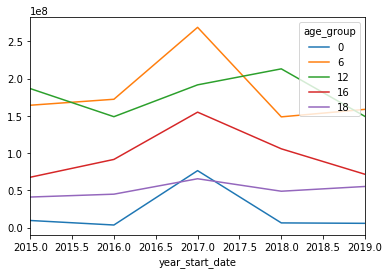

In [67]:
film_age_years.plot()

Из графика очевидно, что возрастные ограничения не влияют на сумму проката. Наибольшая сумма сборов у фильмов 6+, наименьшая у фильмов 0+. В 2017 году, как мы уже знаем (и как видно) из графика была наибольшая сумма сборов. В середине 2017 года фильмы 12+ стали собирать больше денег чем фильмы 6+, хотя в конце 2018 сборы пошли на спад. Так же, с 2016 до 2017 года сборы на фильмы 0+ стали расти и достигли своего пика в 2017 году и даже не надолго фильмы обогнали по сборам фильмы 18+, но потом началось снижение сборов и к 2018 году вернулось к цифрам 2016.

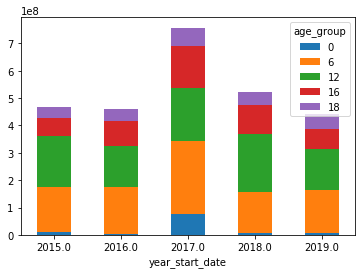

In [86]:
#Код ревбюера
ax = df.pivot_table(index= years, columns = 'age_group',values='box_office').plot(stacked=True, kind='bar')
_=plt.xticks(rotation=360)

##### Вывод

- В 2010 году вышло больше всего фильмов, при этом данные о прокате есть только о 105 фильмах, т.е в этом году самая низкая конверсия: всего 10% и наименьшая сумма сборов - всего 2 млн р. При этом в 2017 году вышло 505 фильмов, была самая высокая конверсия (которая составила 70%) и  наибольшая сумма сборов - 49,6 млн р. 
- Возрастные ограничения не влияют на сумму проката. Наибольшая сумма сборов у фильмов 6+, наименьшая у фильмов 0+. В 2017 году была наибольшая сумма сборов. В середине 2017 года фильмы 12+ стали собирать больше денег чем фильмы 6+, хотя в конце 2018 сборы пошли на спад. Так же, с 2016 до 2017 года сборы на фильмы 0+ стали расти и достигли своего пика в 2017 году и даже не надолго фильмы обогнали по сборам фильмы 18+, но потом началось снижение сборов и к 2018 году вернулось к цифрам 2016.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Создадим столбец с суммарными данными государственной поддержки:

In [68]:
df['gov_help'] = df['refundable_support']+df['nonrefundable_support']

In [69]:
df['gov_help'].sum()

20200688312.0

На поддержку кино выделяется 20 млрд. рублей

Посчитаем % окупаемости фильмов с гос поддержкой:

In [70]:
df['payback_per']=(df['box_office']/df['budget'])*100

Заменим получившиеся inf значения на nan:

In [71]:
df['payback_per'] = df['payback_per'].replace(np.inf, np.nan)

Посмотрим какой процент фильмов с гос. поддержкой в среднем окупается:

In [72]:
df.groupby('gov_help')['payback_per'].sum().mean()

255.2847858440537

Заменим nan на 0, чтобы удобнее было смотреть статистику:

In [73]:
df['payback_per'] = df['payback_per'].fillna(0)

Возьмем 20 фильмов, на которые выделили больше всего гос поддержки и посмотрим какой рейтинг у этих фильмов и какая окупаемость:

In [74]:
df.pivot_table(index= 'title', values = ['ratings','gov_help','box_office','budget', 'payback_per']).sort_values(by='gov_help',ascending=False).head(20)

,box_office,budget,gov_help,payback_per,ratings
title,,,,,
Вторжение,nan,944000000.000,500000000.000,0.000,5.700
Союз спасения,717703185.530,980000000.000,500000000.000,73.235,6.000
Дуэлянт,364285139.600,684200536.000,450000000.000,53.242,6.600
Экипаж .,1402255390.000,635283867.000,442104482.000,220.729,7.600
Движение вверх,2779686144.000,590192191.000,400000000.000,470.980,7.500
Легенда о Коловрате,590405065.000,500012729.000,350000000.000,118.078,6.400
Матильда,511775548.000,1032905957.000,300000000.000,49.547,7.700
Девятая,55876887.400,453704666.000,300000000.000,12.316,5.800
Ледокол,337069662.800,430000000.000,300000000.000,78.388,6.500


In [75]:
df.pivot_table(index= 'main_director', values = ['gov_help']).sort_values(by='gov_help',ascending=False).head(10)

,gov_help
main_director,
Ф.Бондарчук,500000000.000
А.Кравчук,500000000.000
А.Мизгирев,450000000.000
Н.Лебедев,442104482.000
А.Мегердичев,400000000.000
И.Шурховецкий,350000000.000
А.Учитель,300000000.000
О.Степченко,270000000.000
Д.Козловский,260000000.000


Больше всего денег выделяют на фильмы Бондарчука, Кравчука и Шурховецкого

In [76]:
df.pivot_table(index= 'main_genres', values = ['gov_help']).sort_values(by='gov_help',ascending=False).head(10)

,gov_help
main_genres,
история,255000000.000
спорт,151666666.667
фантастика,127818181.818
приключения,99428571.429
детектив,97000000.000
фэнтези,93900000.000
криминал,93333333.333
мультфильм,79403870.968
мюзикл,60113279.750


Больше всего средств выделяют на жанры: история, спорт и фантастическа

#### Вывод

- Наличие гос поддержки не гарантирует высокий рейтинг. 
- Фильм "Экипаж" и "Движение вверх" лучше всего окупились, рейтинг у этих фильмов высокий, но не самый топ. 
- А вот фильм "Большой" с наивысшим рейтингом 8.5 плохо окупился: гос поддержка 210 млн, а кассаовый сбор 228,5 млн руб. 
- Фильм "Дуэлянт" на втором месте по гос поддержке, рейтинг фильма 6.6, но при этом он вообще не окупился: гос поддержка 450 млн руб, а кассовый сбор 364 млн руб.
- Все фильмы, поддерживаемые государством (кроме фильма "Защитники") имеют рейтинг выше 5.5.
- Наибольшую сумму получил фильм "Cоюз спасения" - 500 млн. рублей.
- Внушительные суммы порядка 400-450 млн. рублей также получили "Дуэлянт", "Экипаж", "Движение вверх". Заинтересованность государства в создании всех этих фильмов, возможно, объясняется потребностью создавать патриотическое кино.
- Наиболее окупаемый фильм с гос поддержкой это Движение вверх. Далее так же достаточно окупаемыми являются фильмы: Экипаж, Тренер и Салют-7
- Средняя окупаемость фильмов с гос поддержкой составляет 255%
- Больше всего средств выделяют на жанры: история, спорт и фантастическа
- Больше всего денег выделяют на фильмы Бондарчука, Кравчука и Шурховецкого

### Шаг 5. Напишите общий вывод

- В столбцах:
  - refundable_support, nonrefundable_support, budget, financing_source почти 97% данных пропущенно
  - box_office пропущено 70% данных
  - ratings и genres пропущено 38% данных
  - producer пропущено 35% данных
  - show_start_date, type, film_studio, director, age_restriction пропущено почти 30% данных
- Нулевых значений в стобце ratings нет, поэтому для удобства заменим Nan на 0, остальные пропущенные значения оставим без изменений, чтобы сохранить достоверность исследования
- Добавили новый столбец age_group, который сразу в нужном нам формате int
- Избавились от значка % в столбце с рейтингами, разделили получившиеся целые числа на 10 (скорее всего должно в данных быть не 91%, а рейтинг 9.1)
- Явных дубликатов не выявлено, поэтому поищем неявные дубликаты. Логически в данном исследовании дубликаты могут быть в столбце с названиями фильмов, однако у одного фильма может быть несколько прокатных удостоверений, поэтому создаются дубликаты. Так что удалили дубликаты именно в прокатных удостоверениях
- Почти во всех категориальных столбцах есть повторяющиеся значения, но это не дубликаты. Просто фильмы могут быть одного/нескольких одинаковых жанров, как страна-производитель или студия-производитель. Но из-за этого сложно достать одно какое-то название, так как их несколько под одним индексом
- Добавили столбец с информацией о годе проката. Выделили год из даты премьеры фильма
- Добавили два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно
- Добавили стоблец, в котором посчитали какую долю от общего бюджета фильма составляет государственная поддержка
- В 2010 году вышло больше всего фильмов, при этом данные о прокате есть только о 105 фильмах, т.е в этом году самая низкая конверсия: всего 10% и наименьшая сумма сборов - всего 2 млн р. При этом в 2017 году вышло 505 фильмов, была самая высокая конверсия (которая составила 70%) и  наибольшая сумма сборов - 49,6 млн р.
- Возрастные ограничения не влияют на сумму проката. Наибольшая сумма сборов у фильмов 6+, наименьшая у фильмов 0+. В 2017 году была наибольшая сумма сборов. В середине 2017 года фильмы 12+ стали собирать больше денег чем фильмы 6+, хотя в конце 2018 сборы пошли на спад. Так же, с 2016 до 2017 года сборы на фильмы 0+ стали расти и достигли своего пика в 2017 году и даже не надолго фильмы обогнали по сборам фильмы 18+, но потом началось снижение сборов и к 2018 году вернулось к цифрам 2016.
- На поддержку кино государство выделяет 19 млрд рублей
- Наличие гос поддержки не гарантирует высокий рейтинг. 
- Фильм "Экипаж" и "Движение вверх" лучше всего окупились, рейтинг у этих фильмов высокий, но не самый топ. 
- А вот фильм "Большой" с наивысшим рейтингом 8.5 плохо окупился: гос поддержка 210 млн, а кассаовый сбор 228,5 млн руб. 
- Фильм "Дуэлянт" на втором месте по гос поддержке, рейтинг фильма 6.6, но при этом он вообще не окупился: гос поддержка 450 млн руб, а кассовый сбор 364 млн руб.
- Все фильмы, поддерживаемые государством (кроме фильма "Защитники") имеют рейтинг выше 5.5
- Наибольшую сумму получил фильм "Cоюз спасения" - 500 млн. рублей.
- Внушительные суммы порядка 400-450 млн. рублей также получили "Дуэлянт", "Экипаж", "Движение вверх". Заинтересованность государства в создании всех этих фильмов, возможно, объясняется потребностью создавать патриотическое кино.
- Наиболее окупаемый фильм с гос поддержкой - Движение вверх. Далее, достаточно окупаемыми так же являются фильмы: Экипаж, Тренер и Салют-7
- Средняя окупаемость фильмов с гос поддержкой составляет 250%
- Больше всего средств выделяют на реальное ТВ и спорт жанры
- Больше всего денег выделяют на фильмы Бондарчука и Шурховецкого